# Data Processing and Visualization Notebook

This notebook demonstrates how to load raw data, apply various filtering and event detection functions, and visualize the results using the provided functions from the `filters.py`, `events.py`, and `viz.py` modules.


## Step 1: Set Up the Environment

Import necessary libraries and modules, and load the raw data from a numpy array file.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneurotrace.filters as pyntFilters
import pyneurotrace.events as pyntEvents
import pyneurotrace.viz as pyntViz

Raw data shape: (6, 778)


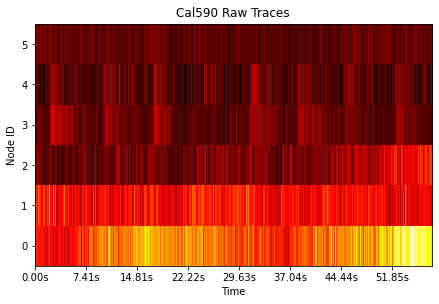

In [2]:
# Load calcium imaging data
rawTimeSeries = np.load('rawCal590Traces.npy')

# Define Import Global Parameters
hz = 13.5

# Display the shape of the loaded data
print(f"Raw data shape: {rawTimeSeries.shape}")

# Plot the intensity of the raw data
_, _ = pyntViz.plotIntensity(rawTimeSeries, hz, title='Cal590 Raw Traces')


## Step 2: Apply Filtering Functions

We will apply several filtering functions to the raw data. These include nndSmooth, okada, and deltaFOverF0 from the filters.py module. Here will will calculate deltaFOverF0 and smooth it with the okada filter

In [3]:
# Parameters for filtering
hz = 13.5  # Sampling rate

# Apply Okada filter to reduce shot noise
okadaTraces = pyntFilters.okada(rawTimeSeries)
print("Applied okada filter")

# Apply deltaFOverF0
dffTraces = pyntFilters.deltaFOverF0(okadaTraces, hz)
print("Applied deltaFOverF0")



Applied okada filter
Applied deltaFOverF0


## Step 3: Visualize the Results

Finally, we will use visualization functions from the viz.py module to plot the results of our data processing to compare the three versions of the trace


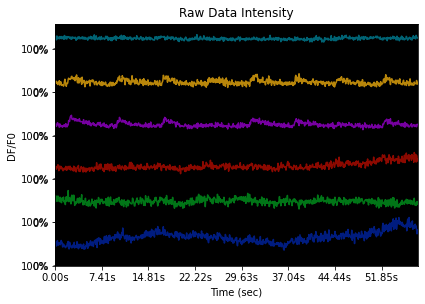

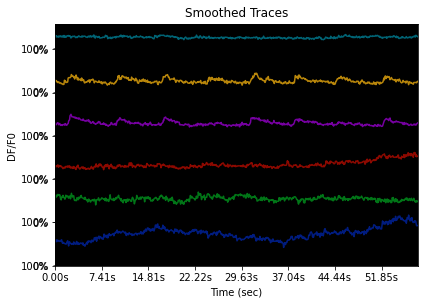

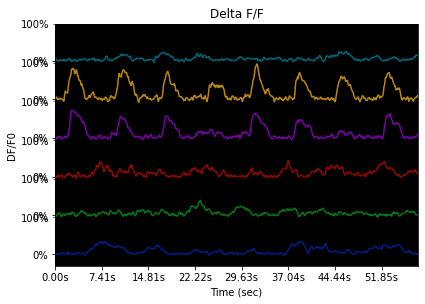

In [4]:
# Plot the raw traces
_, _ = pyntViz.plotLine(rawTimeSeries, hz, title="Raw Data Intensity")

# Plot the smoothed traces
_, _ = pyntViz.plotLine(okadaTraces, hz, title="Smoothed Traces")

# Plot the delta F over F0 data
_, _ = pyntViz.plotLine(dffTraces, hz, title="Delta F/F")




## Step 4: Detect Events

Next, we will use event detection functions from the events.py module. These include ewma, cusum, matchedFilter, and thresholdEvents.

Applied Threshold Events


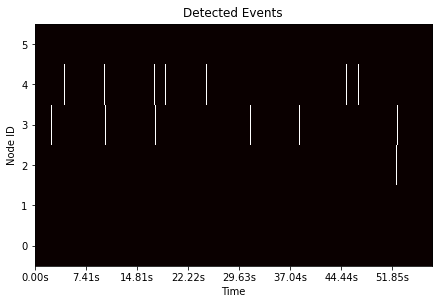

In [5]:

# Parameters for event detection
threshold = 0.4 # Threshold for event detection
min_below_before = 1 # Minimum below threshold before an event

# Apply Threshold Events
threshold_events_data = pyntEvents.thresholdEvents(dffTraces, threshold, min_below_before)
print("Applied Threshold Events")

# Plot Detected events
_, _ = pyntViz.plotIntensity(threshold_events_data, hz, title='Detected Events')